## Deliverable 1

## Analysis of AQI & Census Data by Boston Zip codes

In this analysis, we will be analyzing a dataset that was created by our team. Here are the details of how this dataset was put together:

- Initially, our team fetched zip code specific Air Quality data using the AirNow API for the year 2021.
- Then, we processed that resulting data to show the average AQI for each zip code in 2021.
- Our team also fetched zip code specific census data specifically from metrics DP02, DP03, DO04 and DP05. The data fethed was 2021 5 year estimates.
- Then,  our team combined the two resulting datasets in order to analyze it for Deliverable 1

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('FinalMergedDatasetCorrected.csv')
data.describe()

,Zip code,Total population,Average Household Size,Percentage of Non US Citizens,Percentage of Non-English Speakers,Percentage of people commuting to work,Mean travel time to work (minutes),"Percentage of people commuting to work by car, truck or van -- drove alone",Percentage of people commuting to work by car -- carpoled,Percentage of people working from home,...,Median price of owner occupied units (dollars),Median price of rent occupied units (dollars),Median age (years),Percentage of white people,Percentage of Black or African American people,Percentage of Asian people,Percentage of Native Hawaiian and Other Pacific Islander people,Percentage of Hispanic or Latino People,OZONEAQI,PM2.5AQI
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,2.500000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000
mean,2132.538462,22122.115385,2.087308,52.261538,33.765385,24.503846,27.196154,27.503846,3.876923,13.407692,...,8.315320e+05,2050.576923,33.273077,59.119231,14.634615,12.723077,0.057692,15.350000,31.116375,33.007571
std,30.057586,15408.550552,0.425559,16.444308,12.914393,9.913606,5.660423,12.885138,2.804326,5.157823,...,4.173853e+05,640.330613,6.486883,21.815536,16.943623,10.433995,0.155366,11.599836,0.167781,1.254492
min,2108.000000,1232.000000,1.480000,29.100000,9.900000,7.300000,16.400000,9.100000,0.000000,3.500000,...,4.929000e+05,1059.000000,21.800000,12.100000,0.000000,0.200000,0.000000,1.600000,31.075630,28.839335
25%,2115.250000,7004.750000,1.710000,41.200000,23.075000,17.100000,22.050000,16.275000,1.825000,9.650000,...,5.632000e+05,1634.000000,30.300000,45.225000,3.725000,5.500000,0.000000,8.875000,31.083799,33.369863
50%,2123.000000,23167.000000,2.030000,49.500000,36.600000,23.500000,27.450000,25.000000,3.650000,13.700000,...,6.651000e+05,1912.000000,33.800000,61.250000,6.600000,10.250000,0.000000,12.450000,31.083799,33.369863
75%,2130.750000,31928.750000,2.432500,59.775000,40.175000,33.450000,32.100000,37.550000,5.025000,16.450000,...,9.313000e+05,2321.750000,35.675000,77.175000,20.550000,16.175000,0.000000,19.550000,31.083799,33.369863
max,2215.000000,56070.000000,2.870000,93.100000,63.600000,46.100000,36.700000,56.400000,9.400000,23.400000,...,2.000000e+06,3269.000000,54.600000,89.200000,57.900000,48.300000,0.600000,55.500000,31.938953,33.373626


### Exploring correlations among features 

In [11]:
racial_cols = ['Percentage of white people', 'Percentage of Black or African American people', 
               'Percentage of Asian people', 'Percentage of Native Hawaiian and Other Pacific Islander people', 
               'Percentage of Hispanic or Latino People']

# correlations between AQI and racial composition
ozone_racial_corr = data[racial_cols + ['OZONEAQI']].corr()['OZONEAQI'].sort_values(ascending=False)
pm25_racial_corr = data[racial_cols + ['PM2.5AQI']].corr()['PM2.5AQI'].sort_values(ascending=False)

ozone_racial_corr, pm25_racial_corr

(OZONEAQI                                                           1.000000
 Percentage of Hispanic or Latino People                            0.157852
 Percentage of Black or African American people                     0.126288
 Percentage of white people                                        -0.029734
 Percentage of Native Hawaiian and Other Pacific Islander people   -0.074982
 Percentage of Asian people                                        -0.210706
 Name: OZONEAQI, dtype: float64,
 PM2.5AQI                                                           1.000000
 Percentage of Asian people                                         0.157707
 Percentage of Black or African American people                     0.156363
 Percentage of Native Hawaiian and Other Pacific Islander people    0.114156
 Percentage of white people                                        -0.071025
 Percentage of Hispanic or Latino People                           -0.445443
 Name: PM2.5AQI, dtype: float64)

#### Heatmap Analysis

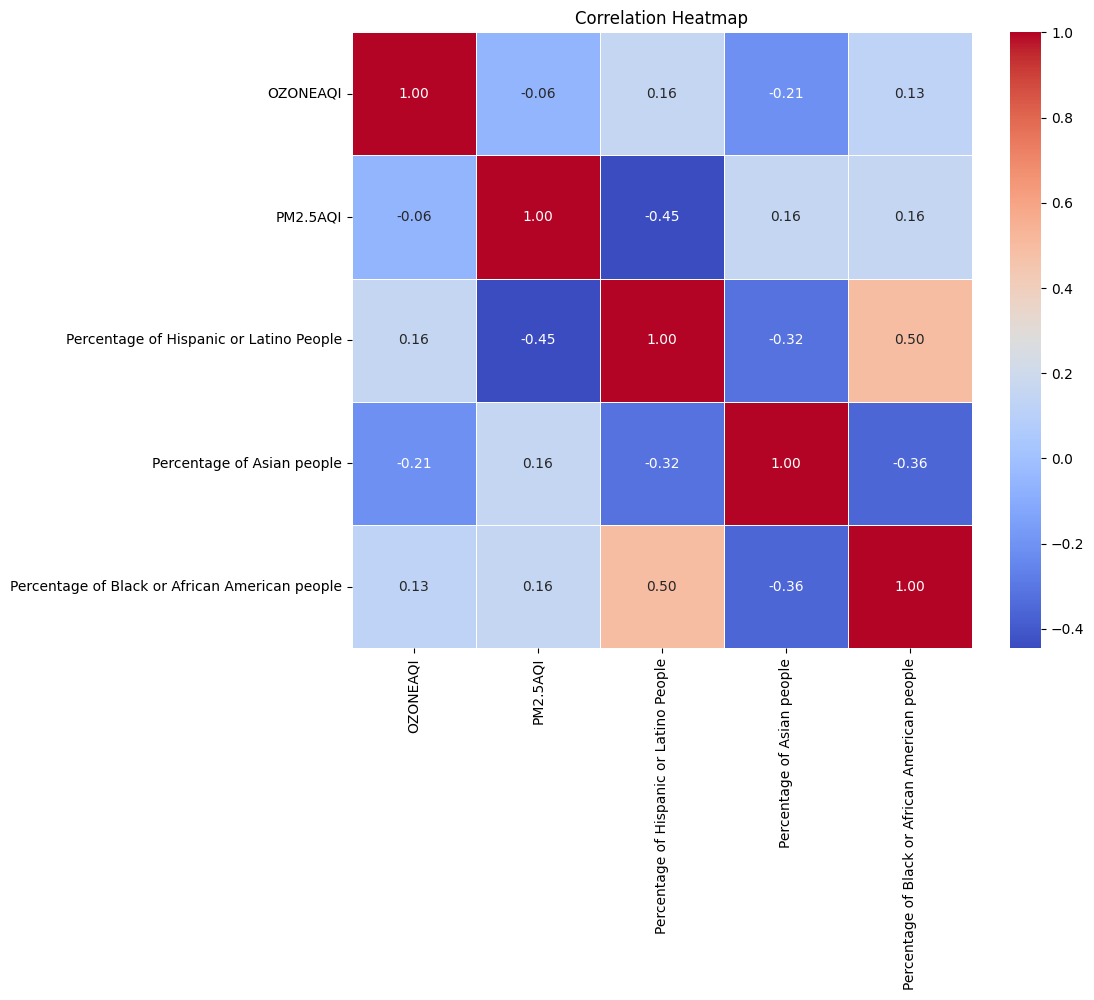

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns  

correlation_matrix = data[['OZONEAQI', 'PM2.5AQI', 'Percentage of Hispanic or Latino People',
                        'Percentage of Asian people', 'Percentage of Black or African American people']].corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

#### Analysis

- Hispanic or Latino People have a positive correlation with OZONEAQI, meaning areas with a higher percentage of Hispanic or Latino residents tend to have higher OZONEAQI values.
- Interestingly, the same demographic shows a strong negative correlation with PM2.5AQI. This suggests that while these areas might have higher ozone levels, they have relatively lower particulate matter levels.
- Asian and Black or African American communities show positive correlations with PM2.5AQI, indicating that areas with a higher percentage of these demographics might have higher particulate matter levels.

In [14]:
commuting_cols = ['Percentage of people commuting to work', 
                  'Mean travel time to work (minutes)', 
                  'Percentage of people commuting to work by car, truck or van -- drove alone',
                  'Percentage of people commuting to work by car -- carpoled',
                  'Percentage of people working from home']

#  correlations between AQI and commuting habits
ozone_commuting_corr = data[commuting_cols + ['OZONEAQI']].corr()['OZONEAQI'].sort_values(ascending=False)
pm25_commuting_corr = data[commuting_cols + ['PM2.5AQI']].corr()['PM2.5AQI'].sort_values(ascending=False)

ozone_commuting_corr, pm25_commuting_corr

(OZONEAQI                                                                      1.000000
 Percentage of people commuting to work by car, truck or van -- drove alone    0.459141
 Mean travel time to work (minutes)                                            0.243002
 Percentage of people commuting to work by car -- carpoled                     0.069522
 Percentage of people commuting to work                                       -0.066155
 Percentage of people working from home                                       -0.076082
 Name: OZONEAQI, dtype: float64,
 PM2.5AQI                                                                      1.000000
 Percentage of people working from home                                       -0.038143
 Percentage of people commuting to work by car -- carpoled                    -0.117130
 Percentage of people commuting to work by car, truck or van -- drove alone   -0.168738
 Mean travel time to work (minutes)                                           -0.253588

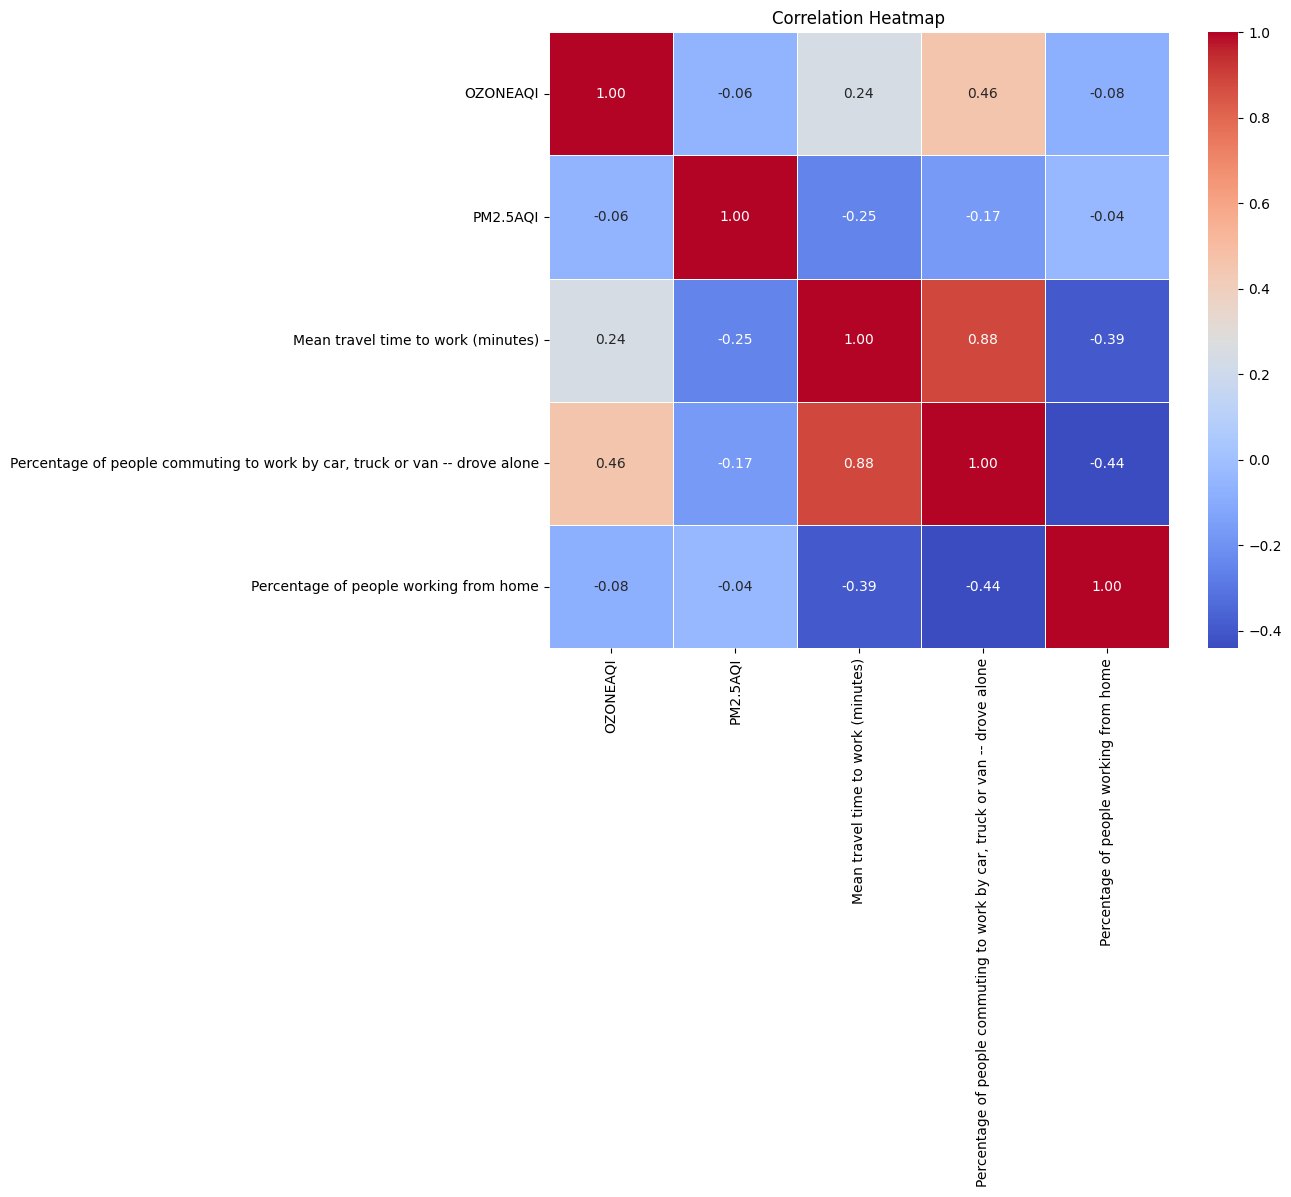

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns  

correlation_matrix = data[['OZONEAQI', 'PM2.5AQI', 'Mean travel time to work (minutes)',
                        'Percentage of people commuting to work by car, truck or van -- drove alone', 'Percentage of people working from home']].corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

#### Analysis

Ozone AQI:

- As observed, areas with more individuals driving alone tend to have elevated OZONEAQI levels. This relationship highlights the potential environmental impact of single-occupancy vehicle commutes. They generally lead to more vehicle emissions compared to carpooling or public transportation.
- Longer commute times are positively correlated with OZONEAQI. This might be due to extended periods of vehicle operation during longer commutes, resulting in more emissions and elevated ozone levels.

PM2.5 AQI:

- A negative correlation in the percentage of people working from home, though weak, suggests that areas with more individuals working from home might have slightly lower PM2.5AQI levels. This is logical as reduced commuting would lead to fewer vehicle emissions and thus potentially lower particulate matter concentrations.
- Interestingly, unlike with OZONEAQI, areas with more individuals driving alone tend to have lower PM2.5AQI levels. The factors contributing to this might be more complex and could involve other pollution sources or atmospheric conditions.

In [16]:
socio_economic_cols = ['Median household income', 
                       'Percentage of people with no health insurance', 
                       'Percentage of unemployed people', 
                       'Percentage of employed people',
                       'Unemployment rate',
                       'Percentage of private wage and salary workers',
                       'Percentage of government workers',
                       'Percentage of people in labor force',
                       'Median price of owner occupied units (dollars)',
                       'Median price of rent occupied units (dollars)'
                      ]

# correlations between AQI and socio-economic metrics
ozone_socio_economic_corr = data[socio_economic_cols + ['OZONEAQI']].corr()['OZONEAQI'].sort_values(ascending=False)
pm25_socio_economic_corr = data[socio_economic_cols + ['PM2.5AQI']].corr()['PM2.5AQI'].sort_values(ascending=False)

ozone_socio_economic_corr, pm25_socio_economic_corr

(OZONEAQI                                          1.000000
 Percentage of government workers                  0.324543
 Percentage of employed people                     0.091048
 Percentage of people in labor force               0.081296
 Percentage of people with no health insurance     0.014629
 Median household income                           0.008276
 Percentage of unemployed people                  -0.054816
 Unemployment rate                                -0.083667
 Median price of rent occupied units (dollars)    -0.121838
 Median price of owner occupied units (dollars)   -0.156540
 Percentage of private wage and salary workers    -0.350152
 Name: OZONEAQI, dtype: float64,
 PM2.5AQI                                          1.000000
 Median price of rent occupied units (dollars)     0.123322
 Median price of owner occupied units (dollars)    0.114098
 Unemployment rate                                 0.066610
 Percentage of private wage and salary workers     0.042453
 Percen

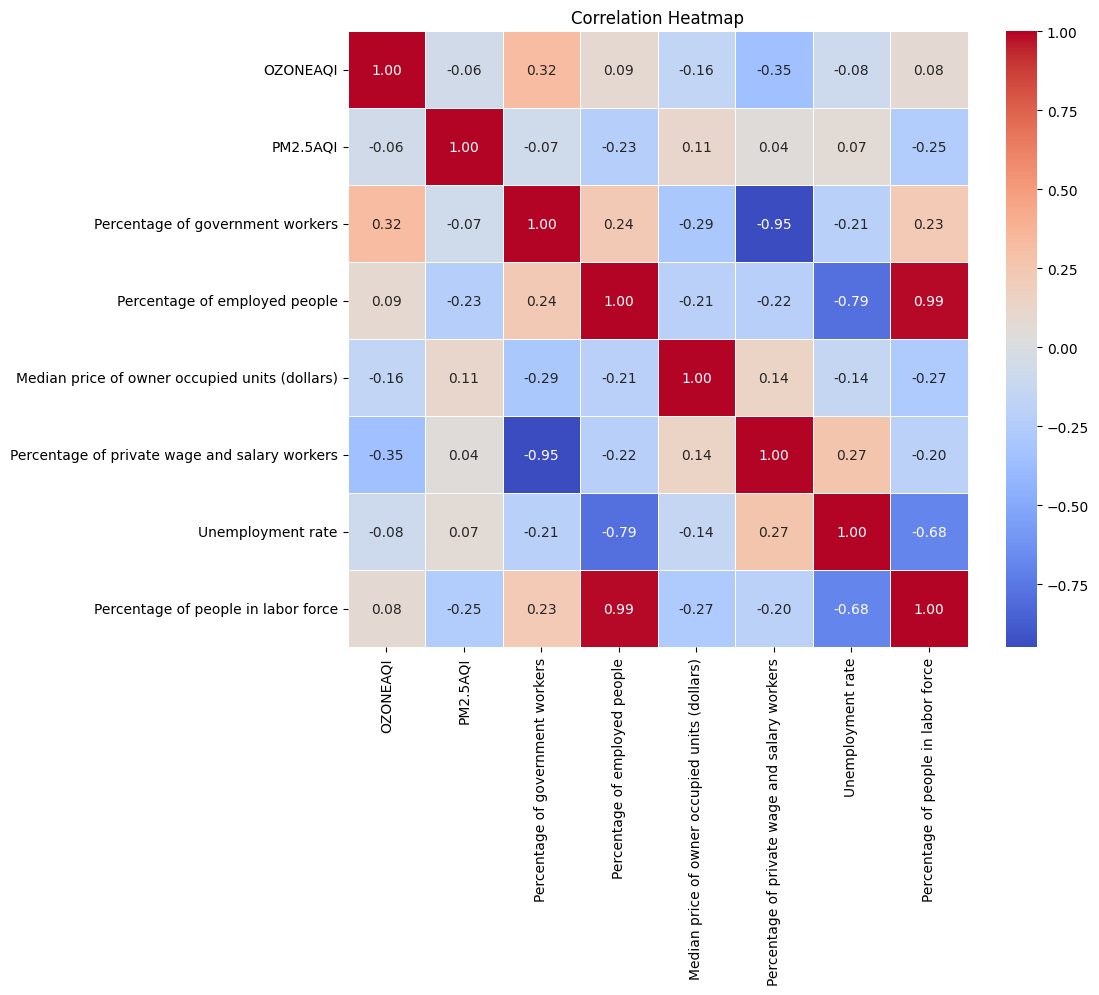

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns  

correlation_matrix = data[['OZONEAQI', 'PM2.5AQI', 'Percentage of government workers',
                        'Percentage of employed people', 'Median price of owner occupied units (dollars)', 'Percentage of private wage and salary workers', 'Unemployment rate', 'Percentage of people in labor force']].corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

#### Analysis

Ozone AQI:

- A positive correlation for the percentage of government workers suggests that areas with a higher proportion of government workers tend to have elevated OZONEAQI levels. This might be due to factors like the location of government offices in urban centers with more traffic emissions.
- There's a slight positive correlation between the percentage of employed people and OZONEAQI levels, suggesting that areas with higher employment might have slightly higher ozone levels.
- Median price of rent occupied units and Median price of owner occupied units both show negative correlations, implying that areas with more expensive housing might have lower OZONEAQI. This could be because pricier neighborhoods have fewer industrial emissions or better urban planning.
- A strong negative correlation for private wage and salary workers suggests that regions with more private-sector workers have lower ozone levels. This could be related to the locations of private businesses, which might be situated in areas with better air quality or have different commuting patterns.

PM2.5 AQI:
- Median price of rent occupied units and Median price of owner occupied units both show positive correlations with PM2.5AQI, indicating that areas with pricier housing might have slightly higher levels of particulate matter. This could be related to urban factors, like dense construction or traffic, in more affluent areas.
-  A mild positive correlation for unemployment rate suggests that areas with higher unemployment rates might have marginally elevated PM2.5AQI levels. This is counterintuitive and might be influenced by other regional factors or sources of particulate matter.
- Median household income doesn't show a strong correlation with either AQI metric.
- Percentage of people in labor force and Percentage of employed people: Both metrics show negative correlations with PM2.5AQI, suggesting that regions with higher workforce participation might have cleaner air in terms of particulate matter. It could be related to the nature of industries in these areas or better urban planning.


### Regression & Clustering Analysis

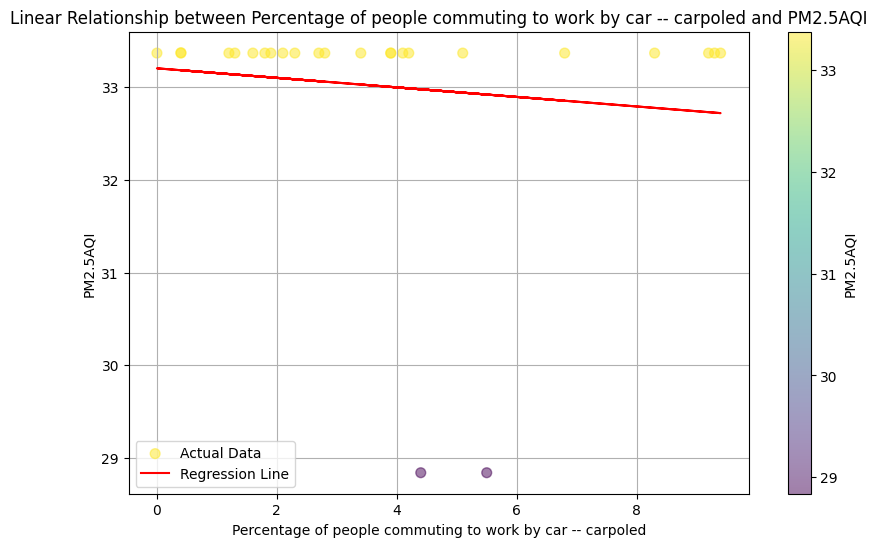

Analysis for Percentage of people commuting to work by car -- carpoled:
Mean Squared Error: 1.49
R^2 (Coefficient of Determination): 0.01
------------------------------------------------------------


[('Percentage of people commuting to work by car -- carpoled',
  1.4900724539462755,
  0.013719512744172713)]

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

transport_cols = ['Percentage of people commuting to work by car -- carpoled']

analysis_results = []

for column in transport_cols:
    
    data_subset = data[[column, 'PM2.5AQI']].dropna(subset=['PM2.5AQI'])
    X_subset = data_subset[[column]]
    y_subset = data_subset['PM2.5AQI']
    
    # training a linear regression model 
    model_subset = LinearRegression()
    model_subset.fit(X_subset, y_subset)
    
    # predictions 
    y_pred_subset = model_subset.predict(X_subset)
    
    mse = mean_squared_error(y_subset, y_pred_subset)
    r2 = r2_score(y_subset, y_pred_subset)
    
    analysis_results.append((column, mse, r2))
  
    plt.figure(figsize=(10, 6))
    plt.scatter(X_subset[column], y_subset, c=y_subset, cmap='viridis', s=50, alpha=0.5, label='Actual Data')
    plt.plot(X_subset[column], y_pred_subset, 'r-', label='Regression Line')
    plt.xlabel(column)
    plt.ylabel('PM2.5AQI')
    plt.title(f'Linear Relationship between {column} and PM2.5AQI')
    plt.colorbar(label='PM2.5AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Analysis for {column}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 (Coefficient of Determination): {r2:.2f}")
    print("-" * 60)

analysis_results

#### Analysis

A value of 0.01 for r^2 means that only 1% of the variance in PM2.5AQI is explained by the "Percentage of people commuting to work by car -- carpoled". This suggests that this particular variable does not have a strong linear relationship with PM2.5AQI in our dataset.

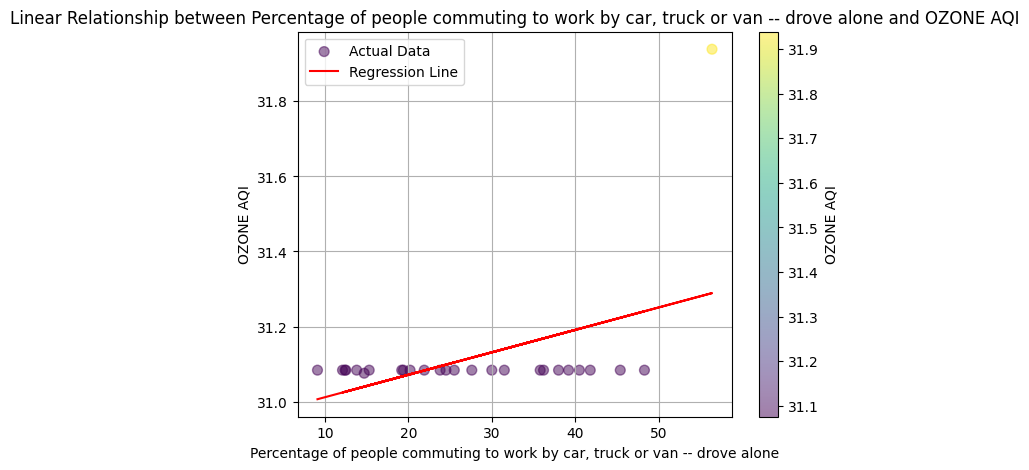

Analysis for Percentage of people commuting to work by car, truck or van -- drove alone:
Mean Squared Error: 0.02
R^2 (Coefficient of Determination): 0.21
------------------------------------------------------------


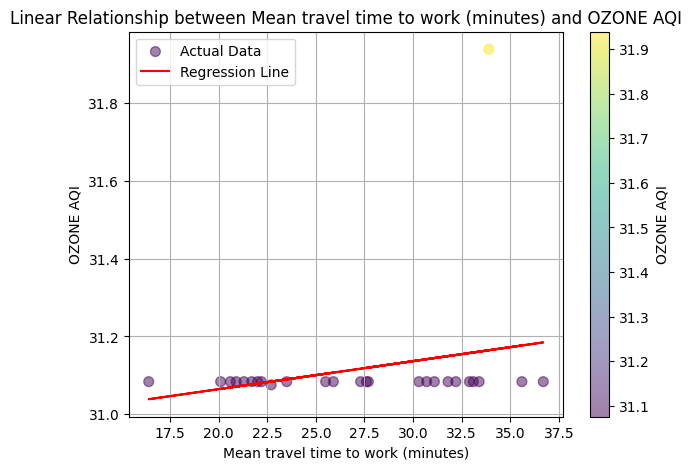

Analysis for Mean travel time to work (minutes):
Mean Squared Error: 0.03
R^2 (Coefficient of Determination): 0.06
------------------------------------------------------------


[('Percentage of people commuting to work by car, truck or van -- drove alone',
  0.021361667976047896,
  0.21081063725035432),
 ('Mean travel time to work (minutes)',
  0.025469506324001398,
  0.05904990715498104)]

In [21]:
other_transport_cols = [
    'Percentage of people commuting to work by car, truck or van -- drove alone',
    'Mean travel time to work (minutes)'
]

analysis_results_other = []

for column in other_transport_cols:
    
    data_subset = data[[column, 'OZONEAQI']].dropna(subset=['OZONEAQI'])
    X_subset = data_subset[[column]]
    y_subset = data_subset['OZONEAQI']
    
    # training a linear regression model
    model_subset = LinearRegression()
    model_subset.fit(X_subset, y_subset)
    
    # predictions 
    y_pred_subset = model_subset.predict(X_subset)
    
    mse = mean_squared_error(y_subset, y_pred_subset)
    r2 = r2_score(y_subset, y_pred_subset)
    
    analysis_results_other.append((column, mse, r2))
    
    plt.figure(figsize=(7, 5))
    plt.scatter(X_subset[column], y_subset, c=y_subset, cmap='viridis', s=50, alpha=0.5, label='Actual Data')
    plt.plot(X_subset[column], y_pred_subset, 'r-', label='Regression Line')
    plt.xlabel(column)
    plt.ylabel('OZONE AQI')
    plt.title(f'Linear Relationship between {column} and OZONE AQI')
    plt.colorbar(label='OZONE AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Analysis for {column}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 (Coefficient of Determination): {r2:.2f}")
    print("-" * 60)

analysis_results_other

#### Analysis

In both tables it is clear to see that the regression lines are heavily affected by the outlier data which causes the models to output an exagerated relationship. This is mainly originating from the fact that the AQI data is not well spread out. This is because of the availability of AQI sensors within Boston. To elaborate further, there only a handful of AQI sensors in Boston. Most zip codes are far away from these sensors, therefore data is fetched from nearby sensors. This causes our AQI data to be very similar for each zip code, which has a negative effect on the analysis of this data.

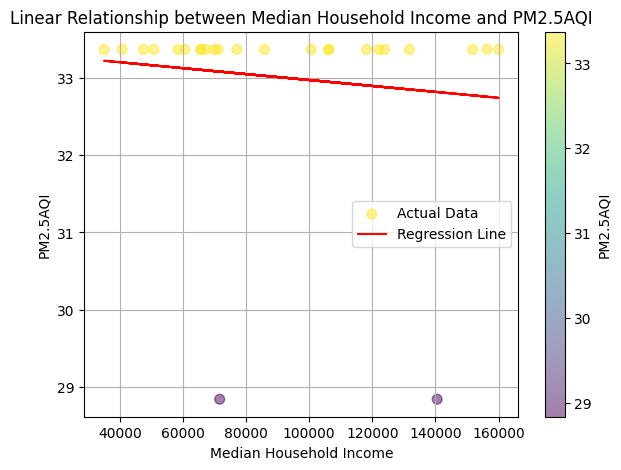

Mean squared error: 1.4903833790464198
R squared: 0.013513711101132864


In [23]:
data_income = data[['Median household income', 'PM2.5AQI']].dropna(subset=['PM2.5AQI'])
X_income = data_income[['Median household income']]
y_income = data_income['PM2.5AQI']

# training a linear regression model
model_income = LinearRegression()
model_income.fit(X_income, y_income)

# predictions
y_all_pred_income = model_income.predict(X_income)

plt.figure(figsize=(7, 5))
plt.scatter(X_income['Median household income'], y_income, c=y_income, cmap='viridis', s=50, alpha=0.5, label='Actual Data')
plt.plot(X_income['Median household income'], y_all_pred_income, 'r-', label='Regression Line')
plt.xlabel('Median Household Income')
plt.ylabel('PM2.5AQI')
plt.title('Linear Relationship between Median Household Income and PM2.5AQI')
plt.colorbar(label='PM2.5AQI')
plt.legend()
plt.grid(True)
plt.show()

mse_income = mean_squared_error(y_income, y_all_pred_income)
r2_income = r2_score(y_income, y_all_pred_income)

print('Mean squared error: ' + str(mse_income))
print('R squared: ' + str(r2_income))

Once more, although it would make sense for the AQI to go down as median household income increases, this deduction would be heavily flawed because of the presence of outliers. It would be sensible to assume that the relationship seen above is correct, however without more precise AQI data for each zip code, making such a deduction would be wrong

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


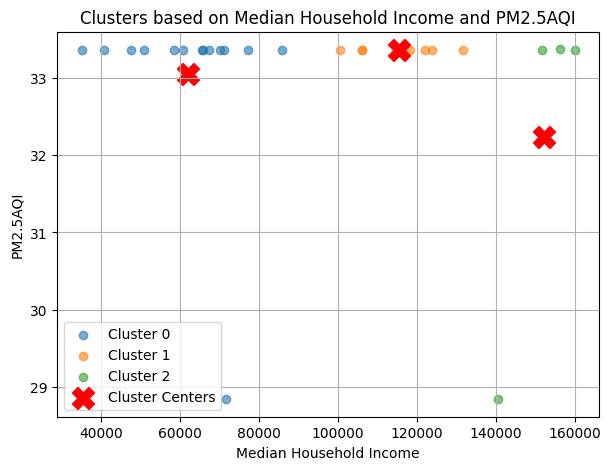

In [24]:
from sklearn.cluster import KMeans

# clustering using KMeans
kmeans_income = KMeans(n_clusters=3, random_state=42)
data_income['Income_Cluster'] = kmeans_income.fit_predict(data_income)

# scatter plot with clusters
plt.figure(figsize=(7, 5))
for cluster_num in range(3):
    cluster_data = data_income[data_income['Income_Cluster'] == cluster_num]
    plt.scatter(cluster_data['Median household income'], cluster_data['PM2.5AQI'], label=f'Cluster {cluster_num}', alpha=0.6)

plt.scatter(kmeans_income.cluster_centers_[:, 0], kmeans_income.cluster_centers_[:, 1], s=250, marker='X', c='red', label='Cluster Centers')
plt.xlabel('Median Household Income')
plt.ylabel('PM2.5AQI')
plt.title('Clusters based on Median Household Income and PM2.5AQI')
plt.legend()
plt.grid(True)
plt.show()

### Analysis

In this cluster, it is possible to see the corellation between median household income and pm2.5 aqi. Looking at the clusters, we can notice that the pm2.5 levels go down as median household income increases. It should be noted, however, that once again the outlier data is causing the 3rd centroid to be placed lower on the aqi scale, which can lead to faulty inferences of tis data. Therefore, no causations should be assumed from this data. 

###########

## Analyzing the PPI index dataset

###########

In our next analysis, we will be anlayzing the PPI index dataset that was provided to us in the project google doc

In [25]:
import pandas as pd
import numpy as np
import folium 
import selenium 
from folium.plugins import MarkerCluster, FastMarkerCluster 


In [26]:
df = pd.read_csv('mapc.health_mapc_ppi_g250.csv')
df.head()

,objectid,g250m_id,commtypid,commtype,nhwhi_10,nhaa_10,nhapi_10,lat_10,nhoth_10,ppi5,shape
0,1,144054.0,3,Maturing Suburbs,26.88,0.37,3.03,0.37,1.04,2,3C00000005000000080010006A69000020000000011000...
1,2,115030.0,3,Maturing Suburbs,33.00,0.00,14.59,0.31,2.10,1,3C00000005000000080010006A69000020000000011000...
2,3,232476.0,4,Developing Suburbs,2.66,0.00,0.00,0.00,0.00,4,3C00000005000000080010006A69000020000000011000...
3,4,112471.0,4,Developing Suburbs,1.34,0.00,0.04,0.02,0.00,0,3C00000005000000080010006A69000020000000011000...
4,5,148255.0,1,Inner Core,0.00,0.00,0.00,0.00,0.00,0,0C01000028000000080010006A690000B0030000011000...


In [27]:
racial_cols = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']
ppi_racial_corr = df[racial_cols + ['ppi5']].corr()['ppi5'].sort_values(ascending=False)
ppi_racial_corr

ppi5        1.000000
nhwhi_10    0.349977
nhoth_10    0.239543
nhapi_10    0.213106
lat_10      0.198676
nhaa_10     0.178618
Name: ppi5, dtype: float64

### Heatmap Analysis

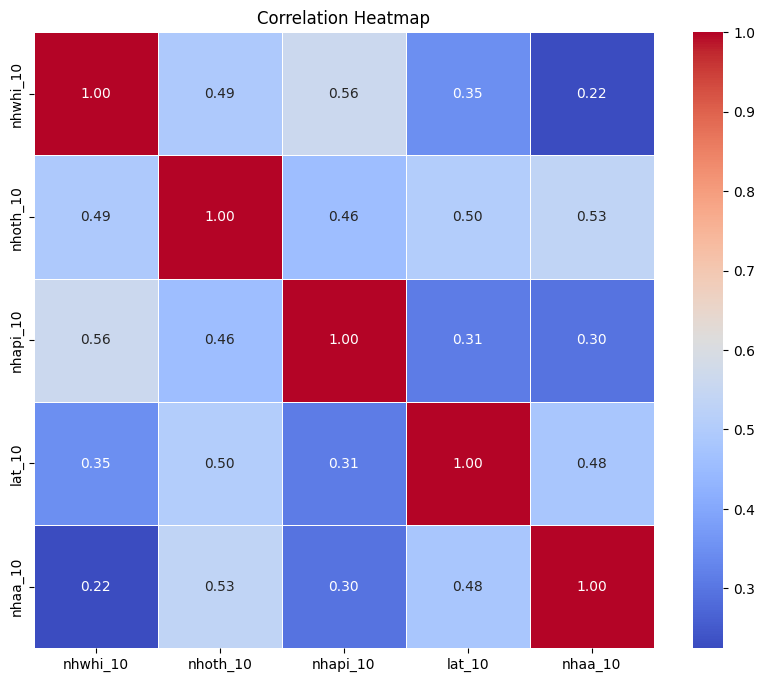

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns  

correlation_matrix = df[['nhwhi_10', 'nhoth_10', 'nhapi_10', 'lat_10', 'nhaa_10']].corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

#### Analysis

We can see that white people have the biggest correlation with ppi, which means that places with white people have more levels of exposure to higher air quality. While we can see that minorities like latinos and african americans have lower correlations with ppi, indicating that places were these minorities live are not as much exposed to areas with multiple high-traffic roadways — in particular, freeways — and urban arterial roads that carry a large volume of diesel-powered freight vehicles.

### Community Type - PPI analysis

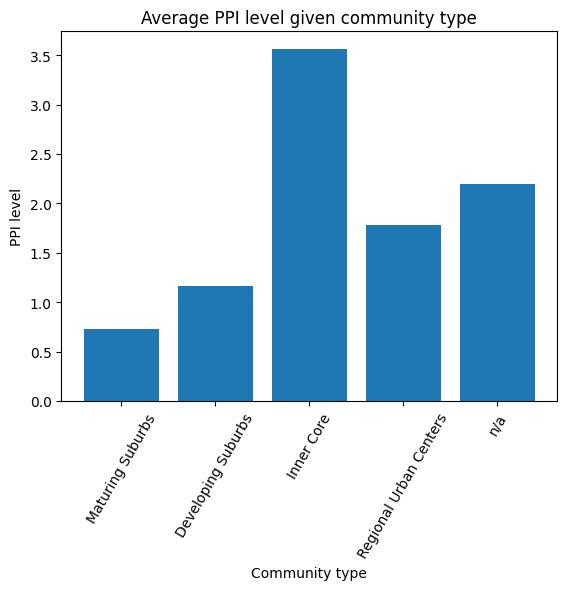

In [29]:
import matplotlib.pyplot as plt

grouped = df.groupby('commtype')
average_ppi = grouped['ppi5'].mean()

average_ppi_list = average_ppi.tolist()

plt.bar(['Maturing Suburbs', 'Developing Suburbs', 'Inner Core', 'Regional Urban Centers', 'n/a'], average_ppi_list)
plt.xlabel('Community type')
plt.xticks(rotation=60) 
plt.ylabel('PPI level')
plt.title('Average PPI level given community type')
plt.show()

#### Analysis

We can see that air quality changes, PPI levels, change dramatically in different types of communities. 
In Maturing Suburbs, PPI is around 0.7, which indicates they are the community with the lowest exposure to areas with multiple high-traffic roadways and thus high levels of ir pollution emissions.
Developing suburbs and Regional Urban centers have a PPI between 1 and 2, which shows higher level of exposure to pullution.
Inner Core communities, refer to the busiest part of the cities, where we found and average PPI level of 3.5 out of 5, indicating very high levels of pullution emissions.

### Clustering Analysis

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


features = df[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']]
target = df['ppi5']

# standardize the features 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# determine the optimal number of clusters 
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# find the number of clusters with the highest silhouette score
optimal_n_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

optimal_n_clusters, silhouette_scores, clusters[:10]  # Show the first 10 cluster labels

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-p

(2,
 [0.9075071901661222,
  0.8743969859629555,
  0.8179444721839523,
  0.8262308368947149,
  0.8276734384424758,
  0.7156843061149906,
  0.7082545558467734,
  0.6965774317317459,
  0.6995107530930605],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32))

In [31]:
df['Cluster'] = clusters
feature_averages_by_cluster = df.groupby('Cluster')[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean().reset_index()
feature_averages_by_cluster

,Cluster,nhwhi_10,nhaa_10,nhapi_10,lat_10,nhoth_10
0,0,30.594889,1.412733,2.165830,1.768075,0.860282
1,1,289.666449,110.181379,71.738688,121.105730,31.481539


Cluster 0:

- White Population (nhwhi_10): On average, 32.35 individuals
- African American Population (nhaa_10): On average, 1.16 individuals
- Asian and Pacific Islander Population (nhapi_10): On average, 2.51 individuals
- Latino Population (lat_10): On average, 1.73 individuals
- Other Races Population (nhoth_10): On average, 0.92 individuals


Cluster 1:

- White Population (nhwhi_10): On average, 227.07 individuals
- African American Population (nhaa_10): On average, 125.79 individuals
- Asian and Pacific Islander Population (nhapi_10): On average, 60.45 individuals
- Latino Population (lat_10): On average, 128.09 individuals
- Other Races Population (nhoth_10): On average, 30.44 individuals

In [32]:
ppi_by_cluster = df.groupby('Cluster')['ppi5'].mean().reset_index()

# sort the clusters by mean PPI score
ppi_by_cluster_sorted = ppi_by_cluster.sort_values(by='ppi5', ascending=False)
ppi_by_cluster_sorted

,Cluster,ppi5
1,1,4.312458
0,0,1.706073


Cluster 1 has a higher mean PPI score of approximately 4.21, suggesting that grid cells in this cluster are closer to high emission roadways and have a higher potential intensity of exposure to pollutants.


Cluster 0 has a lower mean PPI score of approximately 1.71, indicating that grid cells in this cluster are generally further away from high emission roadways, leading to a lower potential intensity of exposure.

### Analysis of clusters

Cluster 0:

Cluster 0 is characterized by much lower population counts across all racial and ethnic groups. The White population averages 32.35 individuals per grid cell, which is the highest among the groups in this cluster. All other racial and ethnic populations, have notably lower averages. The Pollution Proximity Index (PPI) score averages at 1.71, indicating these grid cells typically have lower exposure to vehicle air pollution, suggesting these areas might be more suburban or rural with less traffic congestion and lower emissions.

Cluster 1:

Cluster 1 displays significantly higher average population counts, indicative of higher density living areas, potentially urban centers. With a PPI score averaging at 4.31, these grid cells are associated with a higher potential exposure to vehicle air pollution, likely due to closer proximity to high-emission roadways and more congested traffic patterns common in urban environments.

#### What could these results mean?

Cluster 1 suggests that racially diverse communities are more likely to be situated in urban areas that are exposed to higher levels of vehicle air pollution. This can be a result of historical urban planning policies, socioeconomic factors, and housing affordability that have led to a concentration of minority populations in densely populated urban centers.

The higher PPI scores in Cluster 1 are indicative of potential health risks associated with proximity to high-emission roadways. Since this cluster has significant representation of African American, Asian and Pacific Islander, Latino, and other racial groups, these communities may experience higher exposure to pollutants that are associated with respiratory and cardiovascular diseases. This particularly effects minority populations because they may already be facing challenges in accessing quality healthcare.

The clustering might also reflect underlying socioeconomic factors, as lower-income populations often have fewer choices in housing and may end up living in areas with lower housing costs but higher environmental risks. Efforts to improve air quality could therefore have significant positive impacts on these communities.

In the larger picture, this analysis emphasizes the need for better approaches to urban planning and environmental policy that prioritize health equity and ensure that all populations can enjoy a high quality of air and environment.